This cell installs code that helps us run the rest of the notebook.

In [1]:
!git clone https://github.com/edgi-govdata-archiving/ECHO_modules.git &>/dev/null
!git clone https://github.com/edgi-govdata-archiving/EEW_Industry_Reports.git &>/dev/null
import pandas
import folium
import ipywidgets as widgets
import pdb
import os
import urllib.parse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

This cell allows the user to make selections regarding programs, active facilities, and NAICS codes. make_selections() displays a widget, allowing the user to choose multiple programs from a list, decide if they want to filter by active facilities, and input specific NAICS codes separated by commas. Returns the selections made in the widget.

In [2]:
from EEW_Industry_Reports.backend_scripts.programs_facilities_codes import make_selections
slct = make_selections()

SelectMultiple(description='Programs', options=('NPDES_FLAG', 'AIR_FLAG', 'RCRA_FLAG'), value=())

Checkbox(value=False, description='Only active facilities?')

Text(value='', description='NAICS codes', placeholder='Enter NAICS codes here, separated with a comma')

This cell generates an SQL query based on the selections made by the user in the previous cell. query(slct) takes in the arg slct which contains the selections from the previous cell. Returns the SQL query string.

In [6]:
from EEW_Industry_Reports.backend_scripts.query_and_filter import query
squery = query(slct)

# Access the ECHO_EXPORTER table
# Output will be the matching tracked by EPA
from ECHO_modules.ECHO_modules.get_data import get_echo_data

sql = 'select "FAC_NAME", "CWA_NAICS", "CAA_NAICS", "RCRA_NAICS", "FAC_NAICS_CODES", "FAC_LAT", "FAC_LONG", "FAC_INSPECTION_COUNT", "FAC_DAYS_LAST_INSPECTION" ,"FAC_INFORMAL_COUNT" ,"FAC_FORMAL_ACTION_COUNT", "FAC_PERCENT_MINORITY", "FAC_TOTAL_PENALTIES", "FAC_PENALTY_COUNT", "FAC_QTRS_WITH_NC","EJSCREEN_FLAG_US" from "ECHO_EXPORTER" where ' + squery
try:
  echo = get_echo_data( sql )
except pandas.errors.EmptyDataError:
  print("\nThere are no records.\n")

echo

,FAC_NAME,CWA_NAICS,CAA_NAICS,RCRA_NAICS,FAC_NAICS_CODES,FAC_LAT,FAC_LONG,FAC_INSPECTION_COUNT,FAC_DAYS_LAST_INSPECTION,FAC_INFORMAL_COUNT,FAC_FORMAL_ACTION_COUNT,FAC_PERCENT_MINORITY,FAC_TOTAL_PENALTIES,FAC_PENALTY_COUNT,FAC_QTRS_WITH_NC,EJSCREEN_FLAG_US
0,CONSOLIDATED GRAIN AND BARGE CO.,311224,311222 424510,NaN,311224 311222 115114 424510,37.926260,-87.872230,5,599.0,0,0,7.153,0,NaN,10,Y
1,FRED MEYER CLACKAMAS DISTRIBUTION CENTER,NaN,NaN,49311,115114 49312 49311,45.405908,-122.545806,0,3476.0,0,0,22.058,0,NaN,0,N
2,DANDY COOLING COMPANY~CROSS DOCK SERVICES,NaN,NaN,49312 311119 115114,49312 115114 311119,36.650180,-121.631540,0,NaN,0,0,83.892,0,NaN,0,Y
3,DUCKWALL POOLEY FRUIT,NaN,NaN,NaN,493120 115114,45.653330,-121.507900,0,2707.0,1,1,48.800,6800,1.0,0,N
4,"DANDY COOLING COMPANY, LLC - PACIFIC AVENUE",NaN,NaN,115114 311119,115114 311119,34.192544,-119.164053,1,1767.0,0,0,87.657,0,NaN,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,FROSTY PACKING SOUTH SIDE,115114 493120,NaN,NaN,493120 115114 42448,46.616283,-120.544868,1,453.0,0,0,46.052,0,NaN,0,Y
157,NORTHERN FRUIT CO GRANT ROAD,493120 115114,NaN,425120,425120 115114 493120,47.407883,-120.181351,0,NaN,0,0,34.608,0,NaN,0,N
158,VENTURA PACIFIC CO,NaN,NaN,115114,115114,33.249990,-119.509705,1,1538.0,0,0,NaN,0,NaN,0,N
159,BORTON AND SONS ZILLAH PLANT,115114 493120,NaN,NaN,493120 115114 49312,46.414268,-120.280502,0,2860.0,1,0,72.559,0,NaN,9,Y


This cell outputs the mean and medians of different selected fields from the echo table such as FAC_PERCENT_MINORITY, FAC_TOTAL_PENALTIES, etc.

In [7]:
from EEW_Industry_Reports.backend_scripts.mean_median import metrics
metrics(echo)

FAC_PERCENT_MINORITY:
Mean 45.31263125
Median 40.8955
FAC_TOTAL_PENALTIES
Mean 2272.018633540373
Median 0.0
FAC_PENALTY_COUNT
Mean 1.2941176470588236
Median 1.0
FAC_QTRS_WITH_NC
Mean 4.204968944099379
Median 2.0
FAC_INSPECTION_COUNT
Mean 0.6894409937888198
Median 0.0
FAC_DAYS_LAST_INSPECTION
Mean 1786.8440366972477
Median 1404.0
FAC_INFORMAL_COUNT
Mean 0.2981366459627329
Median 0.0
FAC_FORMAL_ACTION_COUNT
Mean 0.14285714285714285
Median 0.0


This cell generates box plots of different fields.

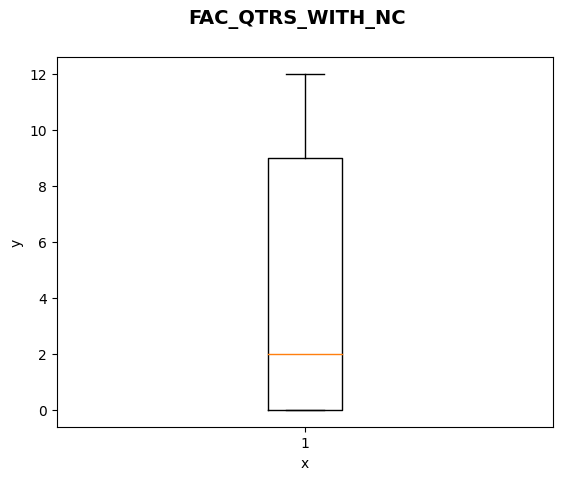

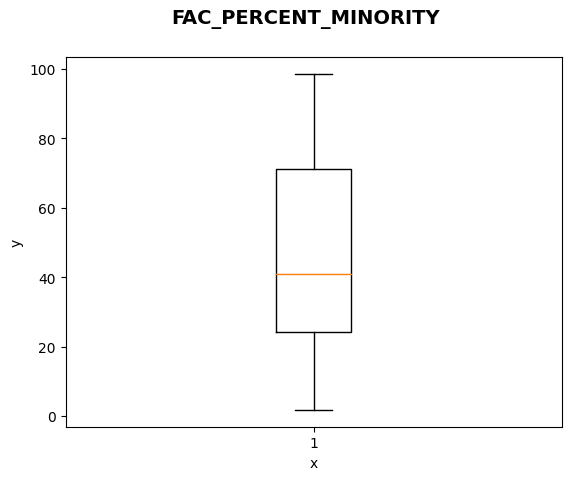

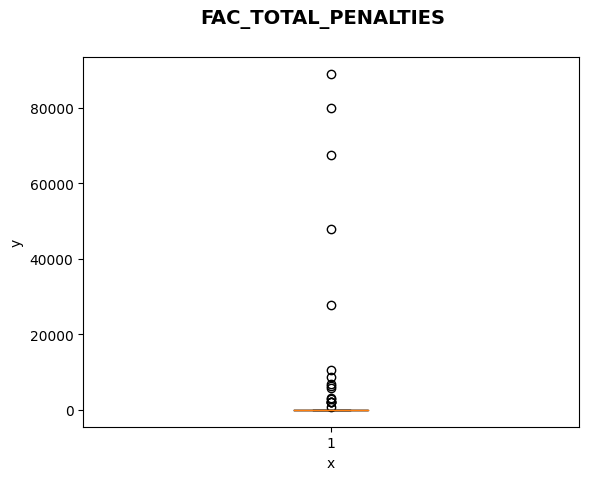

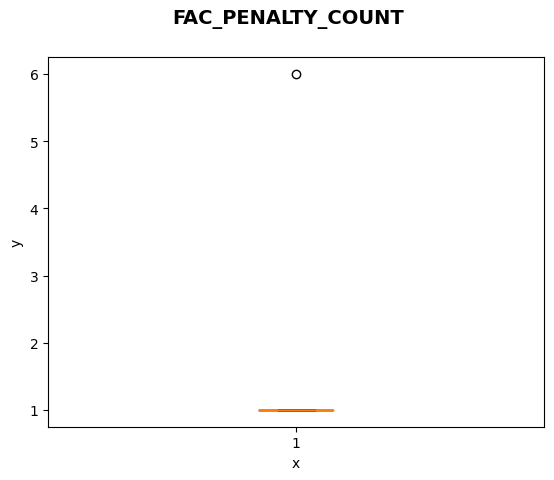

In [8]:
from EEW_Industry_Reports.backend_scripts.graphics import plot_visual_data_box_plot
plot_visual_data_box_plot(echo.FAC_QTRS_WITH_NC, "FAC_QTRS_WITH_NC", "x", "y")
plot_visual_data_box_plot(echo.FAC_PERCENT_MINORITY, "FAC_PERCENT_MINORITY", "x", "y" )
plot_visual_data_box_plot(echo.FAC_TOTAL_PENALTIES, "FAC_TOTAL_PENALTIES", "x", "y" )
plot_visual_data_box_plot(echo.FAC_PENALTY_COUNT, "FAC_PENALTY_COUNT", "x", "y" )

In [10]:
# Export the data to the "Files" side panel for download
echo.to_csv("data.csv")

Mapping the facilities, displaying the name and inspection count of each.

In [11]:
# Map the facilities
from folium.plugins import MarkerCluster
import math

map = folium.Map()
marker_cluster = MarkerCluster().add_to(map)

for index, row in echo.iterrows():
  if math.isnan(row["FAC_LAT"]) or math.isnan(row["FAC_LONG"]): #ignore facilities with no spatial data
    pass
  else:
    marker = folium.Marker(
        location = [float(row["FAC_LAT"]), float(row["FAC_LONG"])],
        popup = row["FAC_NAME"] + ", Inspection count: " + str(row["FAC_INSPECTION_COUNT"])
    ).add_to(marker_cluster)

map
